# Names and IDs
 1. 
 2. 

# I. Condorcet's Jury Theorem (1785)

Assume voter probability be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging)

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers)

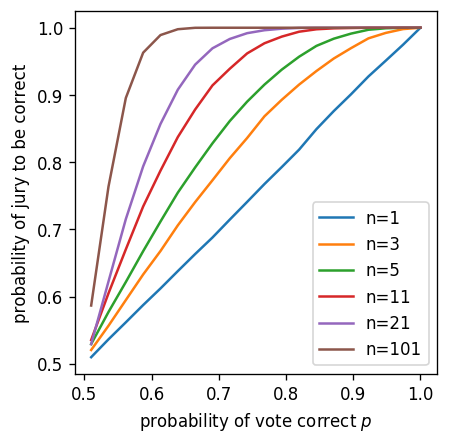

In [79]:
# Implement here

# II. AdaBoost
*  receive a method for creating a weak learner, which has a fit and predict methods/
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` with the next parameters:
        - *tol=1e-10, loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train and 1/3 test sets.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function (or your own) to plot the final decision plane of each ensemble model.
## Answer to the next questions:

 1. How does the overall train set accuracy changes with $n$?
 2. Does you model starts to overfit at some point? How can you test and detect such point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

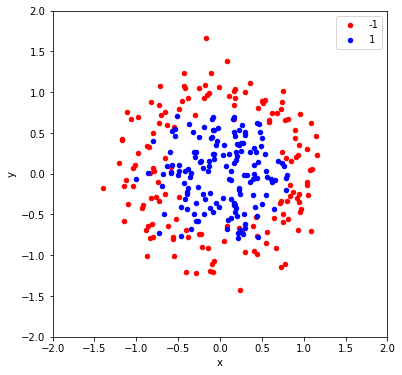

In [44]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [49]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accept X and return the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


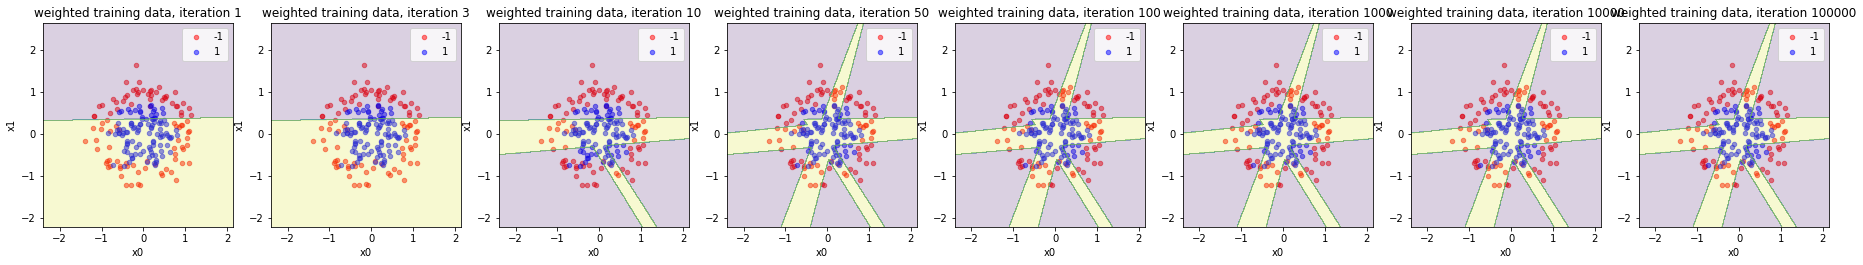

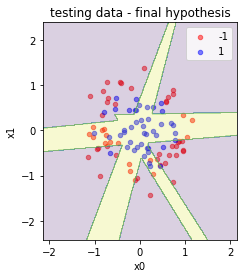

In [62]:
# Implement here

# Your answers here